In [14]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [15]:
np.random.seed(42)
def PointsInCircum(r,n=100):
    return[(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

In [16]:
df = pd.DataFrame(PointsInCircum(500, 1000))

df = pd.concat([df, pd.DataFrame(PointsInCircum(300, 700))], ignore_index=True)

df = pd.concat([df, pd.DataFrame(PointsInCircum(100, 300))], ignore_index=True)

random_points = [(np.random.randint(-600, 600),
                  np.random.randint(-600, 600)) for i in range(300)]

df = pd.concat([df, pd.DataFrame(random_points)], ignore_index=True)


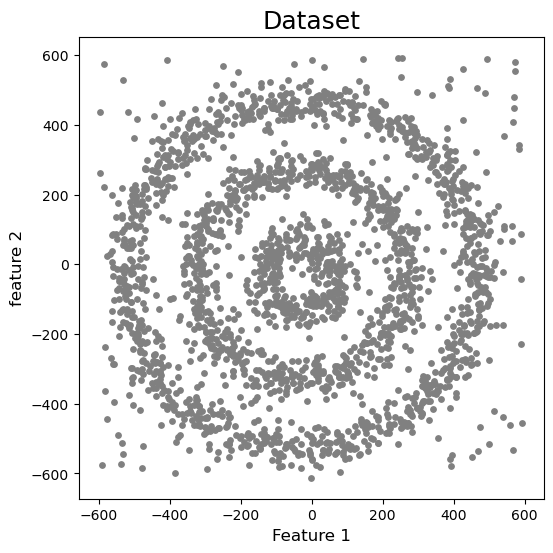

In [17]:
plt.figure(figsize=(6,6))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Dataset',fontsize=18)
plt.xlabel('Feature 1',fontsize=12)
plt.ylabel('feature 2',fontsize=12)
plt.show()

In [18]:
from sklearn.cluster import KMeans

In [19]:
kmeans = KMeans(n_clusters=4,random_state=42)

In [20]:
kmeans.fit(df[[0,1]])

KMeans(n_clusters=4, random_state=42)

In [21]:
df['KMeans_labels'] = kmeans.labels_

In [26]:
from matplotlib import colors

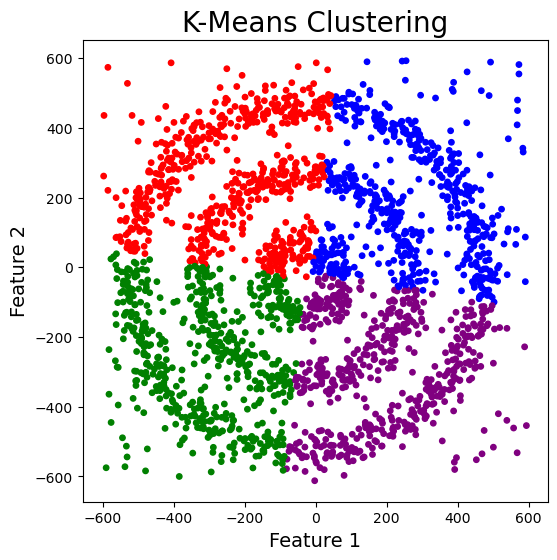

In [28]:
colours = ['purple','red','blue','green']
plt.figure(figsize=(6,6))
plt.scatter(df[0],df[1],c=df['KMeans_labels'],cmap=colors.ListedColormap(colours),s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [29]:
from sklearn.cluster import AgglomerativeClustering

In [31]:
model = AgglomerativeClustering(n_clusters=4,metric='euclidean',linkage='ward')
model.fit(df[[0,1]])

AgglomerativeClustering(n_clusters=4)

In [32]:
df['HR_labels']=model.labels_

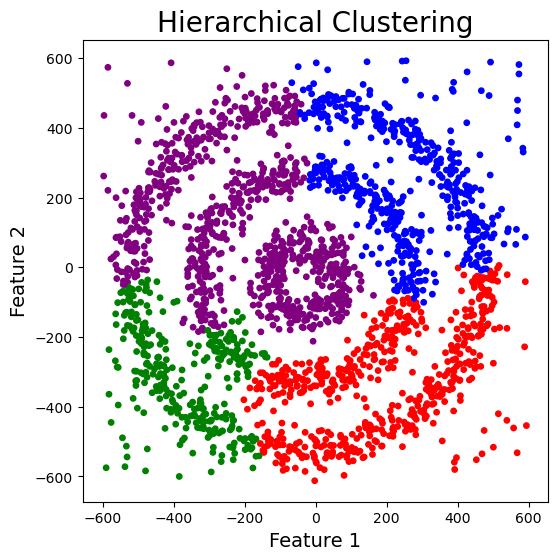

In [33]:
plt.figure(figsize=(6,6))
plt.scatter(df[0],df[1],c=df['HR_labels'],cmap=colors.ListedColormap(colours),s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [34]:
from sklearn.cluster import DBSCAN 

In [35]:
dbscan = DBSCAN(eps=30,min_samples=6)

In [36]:
dbscan.fit(df[[0,1]])

DBSCAN(eps=30, min_samples=6)

In [37]:
df['DBSCAN_opt_labels']=dbscan.labels_

In [38]:
df['DBSCAN_opt_labels'].value_counts()

DBSCAN_opt_labels
 0    1030
 1     730
 2     318
-1     222
Name: count, dtype: int64

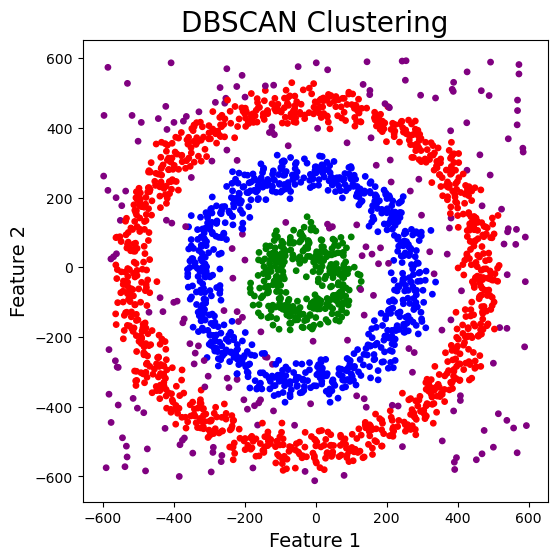

In [40]:
plt.figure(figsize=(6,6))
plt.scatter(df[0],df[1],c=df['DBSCAN_opt_labels'],cmap=colors.ListedColormap(colours),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()